In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv("heart.csv")
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
X = data.drop('target',axis=1)
y = data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.41%


In [27]:
q1 = data.trestbps.quantile(0.25)
q2 = data.trestbps.quantile(0.75)
print(q1,q2)
q3 = data.chol.quantile(0.25)
q4 = data.chol.quantile(0.75)
print(q3,q4)
q5 = data.thalach.quantile(0.25)
q6 = data.thalach.quantile(0.75)
print(q5,q6)
q7 = data.oldpeak.quantile(0.25)
q8 = data.oldpeak.quantile(0.75)
print(q7,q8)

120.0 140.0
211.0 274.5
133.5 166.0
0.0 1.6


In [28]:
IQR1 = q2-q1
print(IQR1)
IQR2 = q4-q3
print(IQR2)
IQR3 = q6-q5
print(IQR3)
IQR4 = q8-q7
print(IQR4)

20.0
63.5
32.5
1.6


In [29]:
lower_limit = q1-1.5*IQR1
upper_limit = q2+1.5*IQR1
print(lower_limit,upper_limit)
lower_limit1 = q3-1.5*IQR2
upper_limit1= q4+1.5*IQR2
print(lower_limit1,upper_limit1)
lower_limit2 = q5-1.5*IQR3
upper_limit2 = q6+1.5*IQR3
print(lower_limit2,upper_limit2)
lower_limit3 = q7-1.5*IQR4
upper_limit3 = q8+1.5*IQR4
print(lower_limit3,upper_limit3)
print(data)

90.0 170.0
115.75 369.75
84.75 214.75
-2.4000000000000004 4.0
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  tar

In [30]:
df_no_outlier =data[(data.trestbps>lower_limit)&(data.trestbps<upper_limit)&(data.chol>lower_limit1)&(data.chol<upper_limit1)&(data.thalach>lower_limit2)&(data.thalach<upper_limit2)&(data.oldpeak>lower_limit3)&(data.oldpeak<upper_limit3)]
print(df_no_outlier)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [31]:
X = df_no_outlier.drop('target',axis=1)
y = df_no_outlier['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.71%


[0.08688694 0.04197234 0.12712016 0.06605202 0.07676611 0.01040796
 0.0210671  0.12529453 0.04286467 0.1122613  0.04920871 0.12676937
 0.11332881]


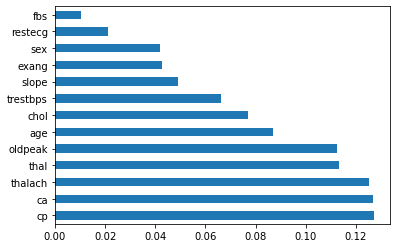

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

/home/nisarga/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.03996343 0.0536773  0.15894184 0.04116196 0.02725624 0.03953845
 0.03697158 0.02872363 0.05006845 0.08974528 0.05265903 0.14058141
 0.24071142]


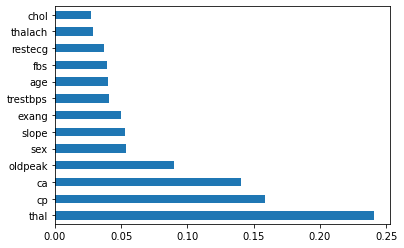

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [42]:
da = df_no_outlier.drop('fbs',axis=1)

In [43]:
d = da.drop('sex',axis = 1)

In [44]:
d

,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,145,233,0,150,0,2.3,0,0,1,1
1,37,2,130,250,1,187,0,3.5,0,0,2,1
2,41,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,120,354,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,1,123,1,0.2,1,0,3,0
299,45,3,110,264,1,132,0,1.2,1,0,3,0
300,68,0,144,193,1,141,0,3.4,1,2,3,0
301,57,0,130,131,1,115,1,1.2,1,1,3,0


In [46]:
X = da.drop('target',axis=1)
y = da['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.14%
